In [1]:
import sys
sys.path.append("/home/irtimid/Documents/travail/programmes/le2m-v2.1/le2m/extractor/")
import extractor
from IPython.display import display, HTML
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Récupération des données

In [2]:
base = sqlite3.connect("data.sqlite")
parts = extractor.get_parts(base)
parts

[u'parties',
 u'sessions',
 u'partie_prisonnersDilemma',
 u'joueurs',
 u'partie_questionnaireFinal',
 u'partie_base',
 u'parties_joueurs__joueurs_parties',
 u'partie_prisonnersDilemma_repetitions']

In [3]:
data = extractor.get_partdata(base, "partie_prisonnersDilemma_repetitions")
data.head()

,session,joueur,id,partie_partie_id,DP_period,DP_treatment,DP_group,DP_decision,DP_decisiontime,DP_decisionother,DP_periodpayoff,DP_cumulativepayoff
0,201510202040,201510202040_j_1,29,53,1,0,201510202040_g_2,0,0,1,25,25
1,201510202040,201510202040_j_1,49,53,2,0,201510202040_g_2,0,0,0,75,100
2,201510202040,201510202040_j_1,69,53,3,0,201510202040_g_2,0,0,0,75,175
3,201510202040,201510202040_j_1,89,53,4,0,201510202040_g_2,0,0,0,75,250
4,201510202040,201510202040_j_1,109,53,5,0,201510202040_g_2,0,0,1,25,275


In [4]:
treatmentscodes = {0:"BASELINE"}

# Groupement des données par traitement

## Moyennes

In [10]:
data_treat = data.groupby(data.DP_treatment).mean()

In [11]:
pd.DataFrame(data_treat)["DP_decision"]

DP_treatment
0               0.6
Name: DP_decision, dtype: float64

## Evolution

In [5]:
data_treatperiods = data.groupby([data.DP_treatment, data.DP_period]).mean()
treatments, periods = data_treat.index.levels

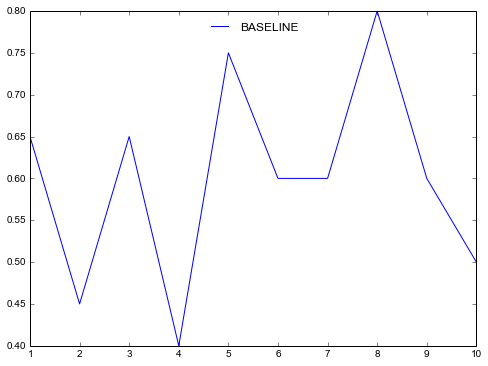

In [6]:
fig, graph = plt.subplots(figsize=(8, 6))
for t in treatments:
    temp = data_treat.loc[data_treat.DP_treatment == t].DP_decision
    graph.plot(periods, temp, label=treatmentscodes.get(t))
    graph.legend(loc=9, frameon=False, ncol=len(treatments))

# Groupement des données par traitement et groupe

In [14]:
data_treatgrpe = data.groupby([data.DP_treatment, data.DP_group]).mean()

## Moyennes

In [15]:
pd.DataFrame(data_treatgrpe)["DP_decision"]

DP_treatment  DP_group        
0             201510202040_g_0    0.85
              201510202040_g_1    0.55
              201510202040_g_2    0.35
              201510202040_g_3    0.60
              201510202040_g_4    0.60
              201510202040_g_5    0.75
              201510202040_g_6    0.55
              201510202040_g_7    0.55
              201510202040_g_8    0.60
              201510202040_g_9    0.60
Name: DP_decision, dtype: float64

## Evolution

In [36]:
data_treatgrpeperiods = data.groupby([data.DP_treatment, data.DP_group, data.DP_period]).mean()

In [37]:
treatments, groups, periods = data_treatgrpeperiods.index.levels

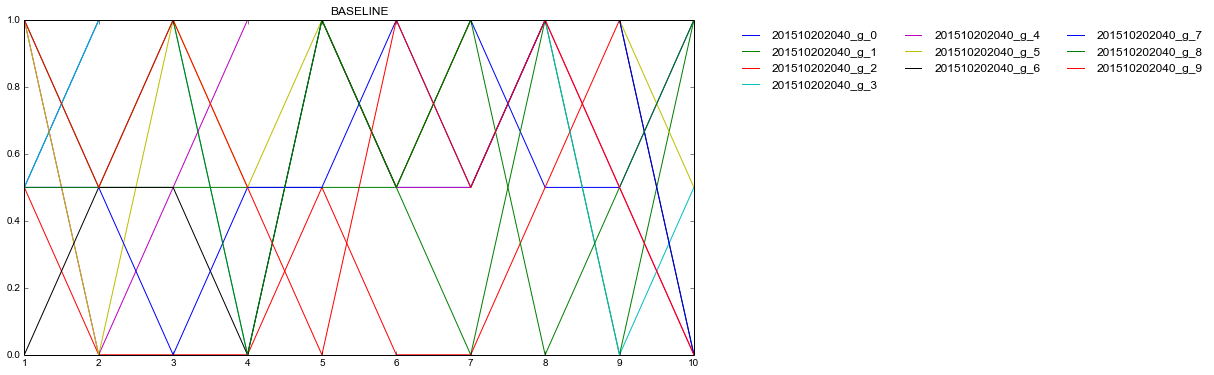

In [50]:
fig = plt.figure(figsize=(12, 6))
for c, t in enumerate(treatments):
    graph = fig.add_subplot(len(treatments), 1, c+1)
    for g in groups:
        temp = data_treatgrpeperiods.ix[t].ix[g].DP_decision
        if not temp.empty:
            graph.plot(periods, temp, label=g)
    graph.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=len(groups)/3, frameon=False)
    graph.set_title(treatmentscodes[t])
            